<a href="https://colab.research.google.com/github/liviamfazolato/liviamfazolato/blob/main/diabetes_base%20tratada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Passo 1: Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



In [9]:
# Passo 2: Carregar os dados

dados = pd.read_excel('diabete_base.xlsx')
dados

,Id,Diabete 0/1,Numero gestacoes,Glicose mg/dl,Pressao arterial mmHg,IMC kg/m²,Idade (anos)
0,1,1,17,163,77,40.9,47
1,2,1,15,136,70,37.1,43
2,3,1,14,100,78,36.6,46
3,4,1,14,175,62,33.6,38
4,5,1,13,126,90,43.4,42
...,...,...,...,...,...,...,...
543,546,0,1,143,84,42.4,22
544,547,0,1,143,74,26.2,21
545,548,0,1,97,68,27.2,22
546,549,0,1,83,68,18.2,27


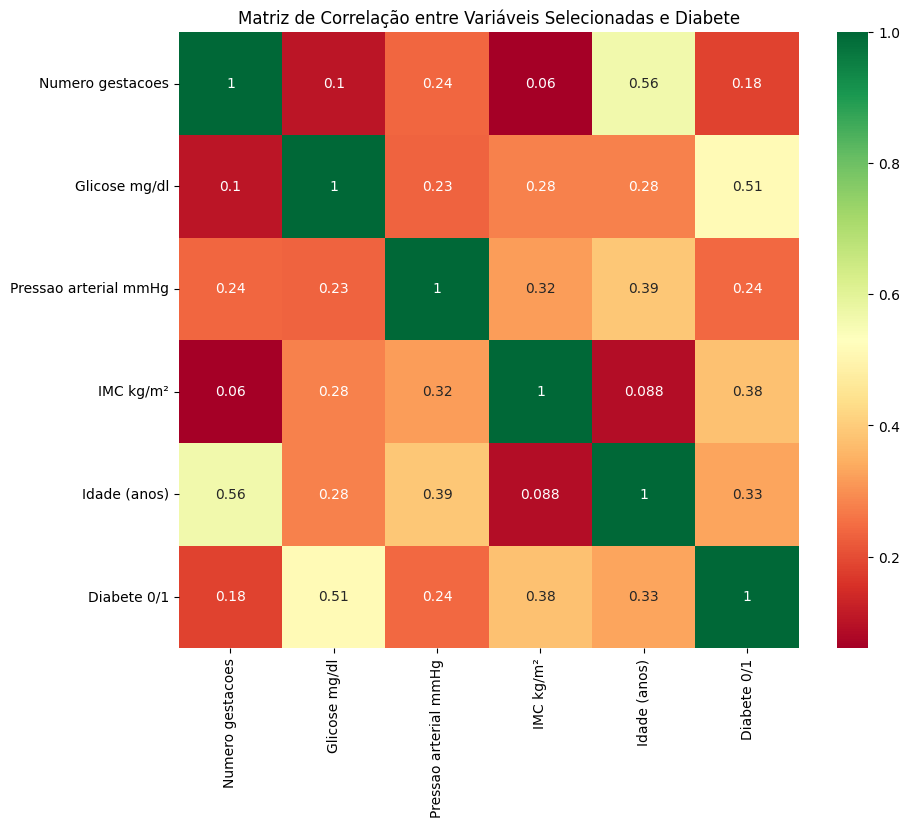

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar as variáveis de interesse
variaveis_interesse = ['Numero gestacoes', 'Glicose mg/dl', 'Pressao arterial mmHg', 'IMC kg/m²', 'Idade (anos)', 'Diabete 0/1']

# Criar um novo DataFrame com apenas as variáveis de interesse
dados_selecionados = dados[variaveis_interesse]

# Calcular a matriz de correlação
corrmat = dados_selecionados.corr()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Plotar o mapa de calor
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")
plt.title('Matriz de Correlação entre Variáveis Selecionadas e Diabete')
plt.show()



In [11]:
# Passo 3: Dividir os dados em conjunto de treinamento e teste
x = dados.drop('Diabete 0/1', axis=1)  # Features
y = dados['Diabete 0/1']  # Variável resposta

# Dividir os dados em conjunto de treinamento e teste (80% treinamento, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
print(y.value_counts())

Diabete 0/1
0    280
1    268
Name: count, dtype: int64


In [13]:
print("Base de Treinamento:")
print("x_train:")
print(x_train)
print("\ny_train:")
print(y_train)


Base de Treinamento:
x_train:
      Id  Numero gestacoes  Glicose mg/dl  Pressao arterial mmHg  IMC kg/m²  \
46    47                 9            140                     94       32.7   
93    94                 7            142                     90       30.4   
464  466                 2             95                     54       26.1   
321  322                 4            123                     80       32.0   
272  273                13            153                     88       40.6   
..   ...               ...            ...                    ...        ...   
71    72                 7            107                     74       29.6   
106  107                 6            115                     60       33.7   
270  271                13            106                     70       34.2   
435  436                 2            129                     84       28.0   
102  103                 6            124                     72       27.6   

     Idade (anos)  
4

In [14]:
print(y_train.value_counts())

Diabete 0/1
0    231
1    207
Name: count, dtype: int64


In [ ]:
# Passo 4: Criar e treinar o modelo de regressão logística

# Inicializar o modelo de regressão logística
modelo = LogisticRegression()
# Treinar o modelo
modelo.fit(x_train, y_train)

# Passo 5: Fazer previsões no conjunto de teste
previsoes = modelo.predict(x_test)


# Passo 6: Avaliar o desempenho do modelo
acuracia = accuracy_score(y_test, previsoes)
relatorio_classificacao = classification_report(y_test, previsoes)

# Passo 7: Exibir métricas de avaliação do modelo
print("Acurácia:", acuracia)
print("\nRelatório de Classificação:\n", relatorio_classificacao)

In [16]:
# Coeficientes do modelo de Regressão Logística
coeficientes_modelo = pd.DataFrame(modelo.coef_)
coeficientes_modelo.columns = x.columns
coeficientes_modelo = coeficientes_modelo.T
coeficientes_modelo.columns = ['Coeficientes']
coeficientes_modelo['Interpretação'] = (np.exp(coeficientes_modelo['Coeficientes']) - 1) * 100
coeficientes_modelo.sort_values(by='Coeficientes', ascending=False)

,Coeficientes,Interpretação
Glicose mg/dl,0.086934,9.082454
IMC kg/m²,0.006757,0.678014
Idade (anos),0.000542,0.054207
Pressao arterial mmHg,-0.163855,-15.113482
Id,-0.333967,-28.392259
Numero gestacoes,-0.490098,-38.743364


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

A matriz de confusão é uma tabela que mostra o desempenho de um modelo de classificação. Ela tem quatro células:

[[TN  FP]

 [FN  TP]]


*   Verdadeiro Negativo (TN): Quando o modelo prevê corretamente que a classe é negativa.Item da lista
*   Falso Positivo (FP): Quando o modelo prevê incorretamente que a classe é positiva.
*   Falso Negativo (FN): Quando o modelo prevê incorretamente que a classe é negativa.
*   Verdadeiro Positivo (TP): Quando o modelo prevê corretamente que a classe é positiva.

Essa matriz nos ajuda a entender como o modelo está acertando ou errando suas previsões.
Quanto mais acertos nos quadrantes TN e TP e menos erros nos quadrantes FP e FN, melhor o desempenho do modelo.


In [18]:
# Calcula a matriz de confusão
conf_matrix = confusion_matrix(y_test, previsoes)

# Mostra a matriz de confusão
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[49  0]
 [ 0 61]]


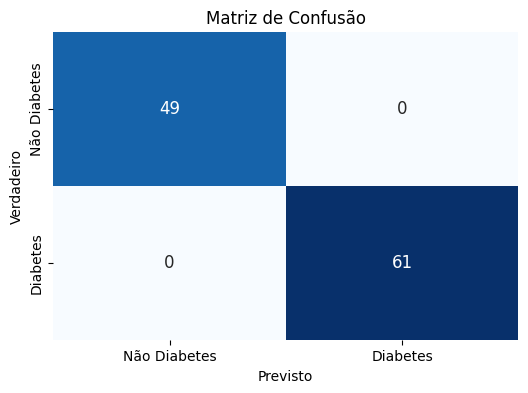

In [19]:
# Cria o heatmap da matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False,
            annot_kws={"size": 12},
            xticklabels=['Não Diabetes', 'Diabetes'],
            yticklabels=['Não Diabetes', 'Diabetes'])
plt.xlabel('Previsto', fontsize=10)
plt.ylabel('Verdadeiro', fontsize=10)
plt.title('Matriz de Confusão', fontsize=12)
plt.show()